<a href="https://colab.research.google.com/github/Vitalyastiy/statistics/blob/main/Boot_nps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')
# %%
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
   # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [ ]:
 
# %%
data_ab=pd.read_csv(r'https://github.com/Vitalyastiy/statistics/blob/main/qwe.csv?raw=true', sep=';')
# %%
data_ab.groupby('flag').agg({'nps': 'mean'})
# %%


In [ ]:
data_ab.groupby('flag').agg({'nps': 'count'})
# %%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


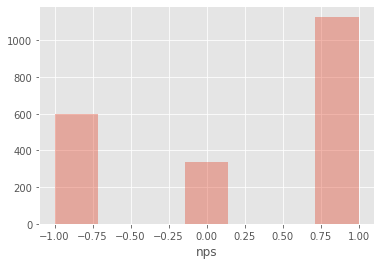

In [9]:
sns.distplot(data_ab[data_ab.flag == 'lsub'].nps, kde=False)
# %%


Ttest_indResult(statistic=3.1472795687546866, pvalue=0.0016610954703394137)

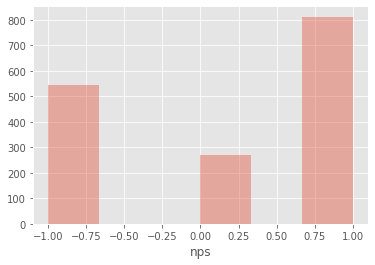

In [10]:
sns.distplot(data_ab[data_ab.flag == 'sub'].nps, kde=False)
# %%
ttest_ind(data_ab[data_ab.flag == 'lsub'].nps, 
             data_ab[data_ab.flag == 'sub'].nps)
# %%


  0%|          | 0/10000 [00:00<?, ?it/s]

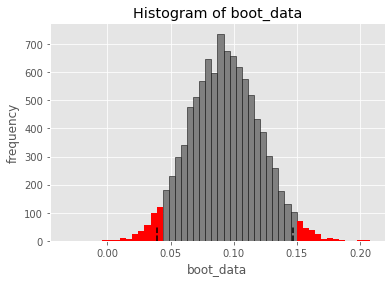

{'boot_data': [0.05660377358490566,
  0.1262699564586357,
  0.07256894049346879,
  0.06773101112723755,
  0.14271891630382197,
  0.07595549104983067,
  0.1069182389937107,
  0.09579100145137881,
  0.08127721335268505,
  0.1185292694726657,
  0.04837929366231253,
  0.06724721819061441,
  0.06579583938074504,
  0.14804063860667635,
  0.06918238993710692,
  0.10595065312046444,
  0.07885824866956942,
  0.16303821964199322,
  0.08563134978229318,
  0.09288824383164006,
  0.06337687469762941,
  0.06724721819061441,
  0.11320754716981132,
  0.0440251572327044,
  0.09530720851475569,
  0.12433478471214321,
  0.03580067731011127,
  0.10256410256410256,
  0.06531204644412192,
  0.09675858732462506,
  0.06531204644412192,
  0.14610546686018383,
  0.08321238509917755,
  0.11030478955007257,
  0.12433478471214321,
  0.06724721819061441,
  0.12433478471214321,
  0.10498306724721819,
  0.07208514755684567,
  0.05853894533139816,
  0.0880503144654088,
  0.12288340590227383,
  0.12723754233188195,
  0

In [11]:
get_bootstrap(
    data_ab[data_ab.flag == 'lsub'].nps, # числовые значения первой выборки
    data_ab[data_ab.flag == 'sub'].nps, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)


In [ ]:
# %%
get_bootstrap(
    data_ab[data_ab.flag == 'lsub'].nps, # числовые значения первой выборки
    data_ab[data_ab.flag == 'sub'].nps, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)
# %%